In [1]:
import warnings

# Nonaktifkan pesan peringatan
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [86]:
df.min()

Size          -7.151703
Weight        -7.149848
Sweetness     -6.894485
Crunchiness   -6.055058
Juiciness     -5.961897
Ripeness      -5.864599
Acidity       -7.010538
Quality        0.000000
dtype: float64

In [4]:
df.shape

(4001, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [8]:
#remove data nulll
df = df.dropna()

In [9]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [11]:
df = df.drop(columns=['A_id'])

In [12]:
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [13]:
from sklearn.preprocessing import LabelEncoder
# Membuat objek LabelEncoder
encoder = LabelEncoder()

# Mengkodekan kolom 'Quality'
df['Quality'] = encoder.fit_transform(df['Quality'])

df.head(4)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1


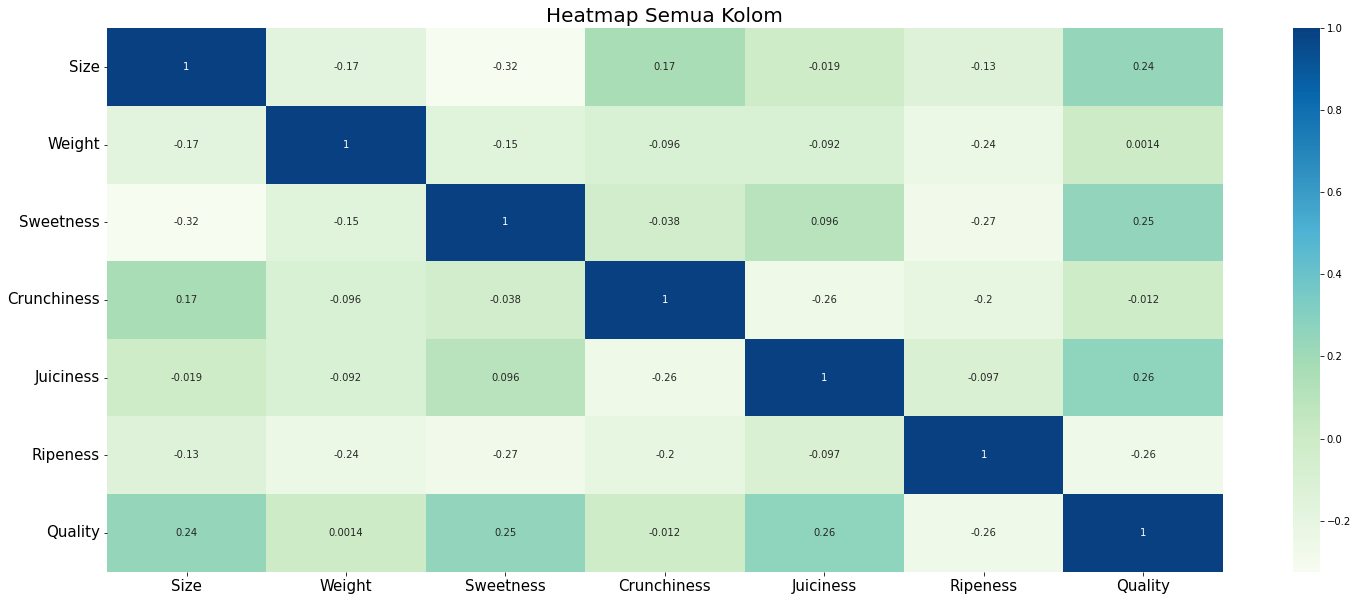

In [14]:
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='GnBu') #GnBu, PuBu, YlGnBu, RdPu, YlGn
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
plt.title('Heatmap Semua Kolom', fontsize=20)
plt.show()

In [15]:
total = df.Quality.value_counts()
total

1    2004
0    1996
Name: Quality, dtype: int64

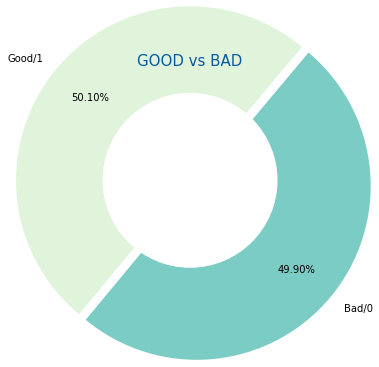

In [16]:
plt.pie(total, labels=['Good/1', 'Bad/0'], colors=['#e0f3db', '#7bccc4'], startangle=50, radius=2,
       explode=(0,0.1), autopct='%1.2f%%', pctdistance=0.75)

Circle = plt.Circle((0,0), 1, color='white')
c = plt.gcf()
c.gca().add_artist(Circle)

plt.title('GOOD vs BAD', color='#08589e', fontsize=15)
plt.show()

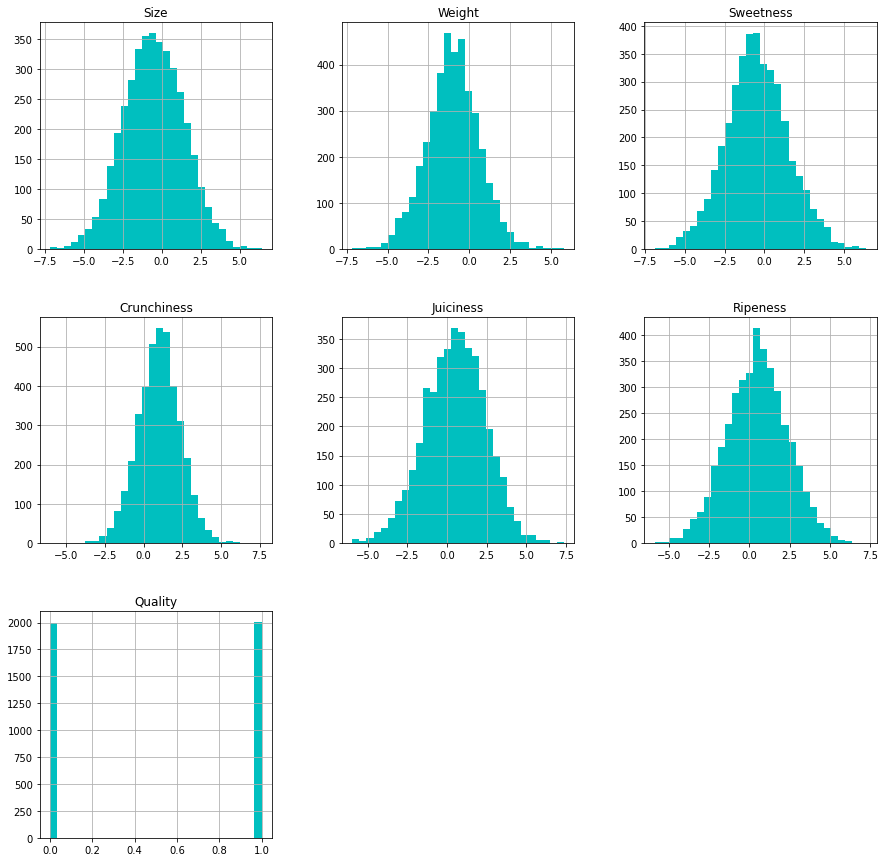

In [17]:
df.hist(figsize=(15,15), bins=30, color='c')
plt.show()

In [18]:
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,1


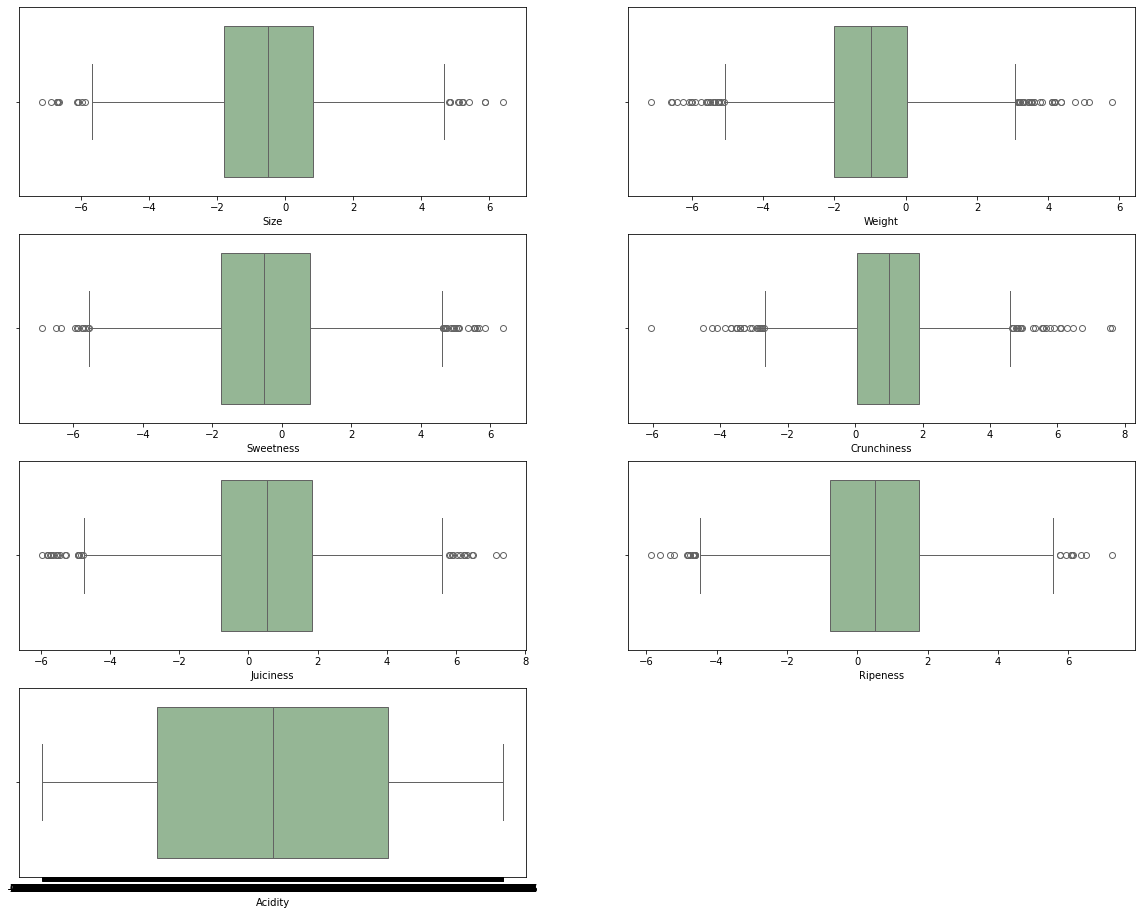

In [19]:
#melihat outlier
# Set up figure
fig = plt.figure(figsize = (20,16))

# Plotting boxplots
nbin_var = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
for i, v in enumerate(nbin_var):
    axes = fig.add_subplot(4, 2, i+1)
    sns.boxplot(x = v, data = df, ax = axes, color='#8FBC8F')

In [20]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int32
dtype: object

In [21]:
df['Acidity'] = df['Acidity'].astype(float)

In [22]:

# Hitung Q1, Q3, dan IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Hitung Lower Bound dan Upper Bound untuk setiap kolom
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier untuk setiap kolom
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Jumlah outlier untuk setiap kolom:")
print(outliers)

Jumlah outlier untuk setiap kolom:
Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64


In [23]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Hitung Lower Bound dan Upper Bound untuk setiap kolom
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier untuk setiap kolom
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Hitung total nilai outlier dari seluruh data
total_outliers = outliers.sum()

# Hitung total data
total_data = df.size

# Hitung persentase outlier dari total data
percentage_outliers = (total_outliers / total_data) * 100

print("Total nilai outlier dari seluruh data:", total_outliers)
print("Persentase outlier dari seluruh data: {:.2f}%".format(percentage_outliers))

Total nilai outlier dari seluruh data: 231
Persentase outlier dari seluruh data: 0.72%


In [24]:
banyak_data_outlier = 1000  # Ganti dengan jumlah outlier yang Anda miliki
total_banyak_data = 32000  #(4000*8)# Ganti dengan total banyak data yang Anda miliki

persentase_data_outlier = (banyak_data_outlier / total_banyak_data) * 100

print("Persentase data outlier:{:.2f}%".format(persentase_data_outlier))

Persentase data outlier:3.12%


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(['Quality'], axis=1)  # fitur
y = df['Quality']  # label

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Decision Tree Classifier with scaled features
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the models
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Classifier:
Accuracy: 0.81
Confusion Matrix:
 [[327  74]
 [ 78 321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.81      0.80      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



In [65]:
# Decision Tree Classifier with scaled features
rdm_frst = RandomForestClassifier(random_state=42, n_estimators=1000)
rdm_frst.fit(X_train,y_train)
rdm_predictions = rdm_frst.predict(X_test)

# Evaluate the models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rdm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rdm_predictions))
print("Classification Report:\n", classification_report(y_test, rdm_predictions))

Random Forest Classifier:
Accuracy: 0.91
Confusion Matrix:
 [[362  39]
 [ 33 366]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       401
           1       0.90      0.92      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [64]:
rf = RandomForestClassifier()
#adb = RandomForestClassifier(base_estimator=AdaBoostClassifier)  # Using a weak learner
rfA = AdaBoostClassifier(RandomForestClassifier(n_estimators=1000, random_state=42))
rfA.fit(X_train,y_train)
rf_predictions = rfA.predict(X_test)

# Evaluate the models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.91
Confusion Matrix:
 [[362  39]
 [ 33 366]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       401
           1       0.90      0.92      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



##### Tips 1 menampilkan feature importance

In [68]:
# Fitur penting dari Random Forest
rf_feature_importance = rdm_frst.feature_importances_

# Menampilkan fitur penting
print("Random Forest Feature Importance:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {rf_feature_importance[i]}")

Random Forest Feature Importance:
Size: 0.16209493979621933
Weight: 0.1192131332574732
Sweetness: 0.15202739157104275
Crunchiness: 0.11207159002174483
Juiciness: 0.155742240714293
Ripeness: 0.16794842960739295
Acidity: 0.13090227503183402


##### Tips 2 menampilkan feature importance (dengan visualisasi keren)

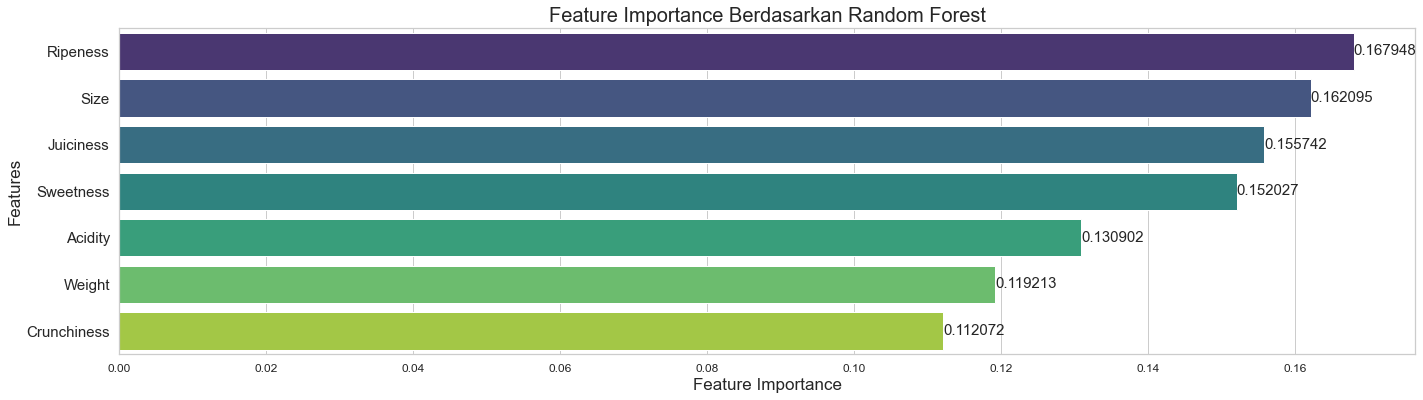

In [69]:
df_feature_importance1 = pd.DataFrame(rdm_frst.feature_importances_, index=X_train.columns,
                                       columns=['feature importance']).sort_values('feature importance',
                                                                                ascending=False)
# Set style
sns.set(style="whitegrid")

# Membuat plot bar horizontal dengan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='feature importance', y=df_feature_importance1.index, data=df_feature_importance1, palette='viridis')

# Mengatur ukuran angka di sumbu x
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)
#membuat label nilai
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
    
plt.xlabel('Feature Importance', fontsize=17)
plt.ylabel('Features', fontsize=17)
plt.title('Feature Importance Berdasarkan Random Forest', fontsize = 20)

# Menyesuaikan posisi sumbu y
plt.subplots_adjust(left=-0.9)
plt.show()

In [70]:
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809,1


### Mengecek kembali hasil dari prediksi di atas apakah benar atau tidak

In [71]:
max_values = df[['Ripeness', 'Size', 'Juiciness', 'Sweetness']].max()

#tampilkan hasil
print('Nilai maksimum dari setiao kolom:')
print(max_values.sort_values(ascending=False))

Nilai maksimum dari setiao kolom:
Juiciness    7.364403
Ripeness     7.237837
Size         6.406367
Sweetness    6.374916
dtype: float64


In [72]:
max_result = df[(df['Ripeness'] == 7.237836684) | (df['Size'] == 6.406366899) | (df['Juiciness'] == 7.364402864) | (df['Sweetness'] == 6.374915513)][['Ripeness', 'Size', 'Juiciness', 'Sweetness', 'Quality']]                      
max_result

,Ripeness,Size,Juiciness,Sweetness,Quality
1381,3.995602,6.406367,0.999640,-4.164118,1
2502,7.237837,-0.921677,0.447844,-4.685317,0
2691,-0.336443,-4.122996,2.835063,6.374916,1
3874,-1.342563,1.925888,7.364403,-0.127441,1


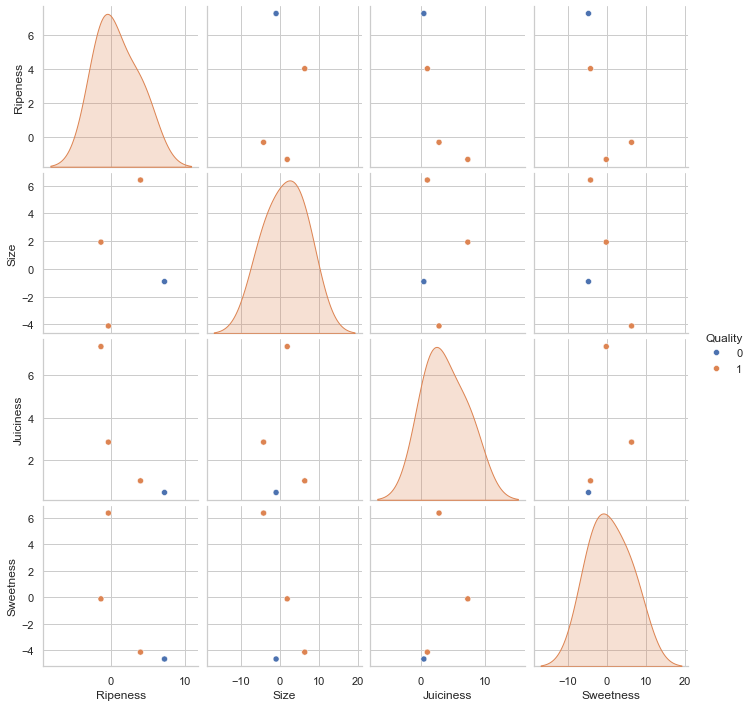

In [73]:
# Membuat scatter plot
sns.pairplot(max_result[['Ripeness', 'Size', 'Juiciness', 'Sweetness', 'Quality']], hue='Quality', diag_kind='kde')
plt.show()

In [74]:
# Mencari nilai maksimum dari beberapa kolom
min_values = df[['Ripeness', 'Size', 'Juiciness', 'Sweetness']].min()

# Menampilkan nilai maksimum
print("Nilai minimum dari setiap kolom:")
print(min_values)

Nilai maksimum dari setiap kolom:
Ripeness    -5.864599
Size        -7.151703
Juiciness   -5.961897
Sweetness   -6.894485
dtype: float64


In [75]:
 #df[df[['Ripeness', 'Size', 'Juiciness', 'Sweetness']] == min_values]
#
df.Ripeness.min()
df.Size.min()
df.Juiciness.min()
df.Sweetness.min()

-6.894485494

In [76]:
df[(df['Ripeness'] == -5.864598918) | (df['Size'] == -7.151703059) | (df['Juiciness'] ==-5.961897048) | (df['Sweetness'] ==-6.894485494)][['Ripeness', 'Size', 'Juiciness', 'Sweetness', 'Quality']]                      

,Ripeness,Size,Juiciness,Sweetness,Quality
161,-5.864599,3.256911,-4.283278,-0.403344,0
2232,0.301017,-0.214485,-5.961897,-3.942249,0
2832,2.291800,-1.520566,0.129411,-6.894485,0
3559,4.127709,-7.151703,-0.136146,1.673138,0


In [79]:
import pickle
# Save the model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rdm_frst, file)

## Conclution
diketahui algoritma memiliki nilai tertinggi adalah random forest dan berdasarkan hasil difiture importance dari random fores dapat dilihat kolom yang sangat perpengaruh terhadap quality good atau bad pada sebuah apple adalah (Ripeness, Size, Juiciness, Sweetness)

- diketahui juga bahwa apabila Ripness tinggi maka quality dari aple tersebut terprediksi **Bad**
- apabila Size, Juiciness, Swetness bernilai tinggi maka aple dikategoruikan aple **good** dan begitupun sebaliknya apabila nilai rendah maka aple akan bernilai **Bad**

Dari hasil prediksi yang ditampilkan menggunakan feature importance di atas dapat dibuktikan prediksi benar  

## Saran:
Jadi apabila ingin memilih aple dengan kualitas **GOOD**
pililhlah dengan **Size besar**, rasanya **Juiciness** dan **Sweetness**, namun apabila berdasarkan nilai pilih juga dengan nilai **Ripeness rendah**